In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

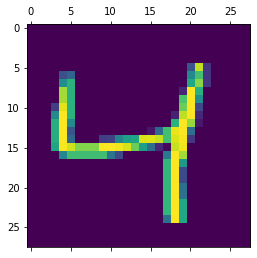

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
y_train[2]

4

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#Creating a simple neural network
#with input layer of inputs and 10 outputs

In [13]:
#inbuilt keras flattening

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0485 - accuracy: 0.7230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3471 - accuracy: 0.9019
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2977 - accuracy: 0.9165
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9249
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2432 - accuracy: 0.9317


In [23]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [24]:
cnn = keras.models.Sequential([
    #cnn layer 1
    keras.layers.Conv2D(filters = 30, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')    
])

In [25]:
cnn.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3438 - accuracy: 0.8946
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0439 - accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0073 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 35s 18m

In [28]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0593 - accuracy: 0.9842


[0.05934135615825653, 0.9842000007629395]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.0422548e-10, 5.3865606e-10, 5.5080712e-08, 4.6183346e-09,
        9.1748536e-12, 3.8702570e-15, 1.0247753e-18, 9.9999988e-01,
        2.4604105e-10, 8.7323010e-10],
       [3.3723896e-12, 6.5110173e-10, 1.0000000e+00, 5.8593169e-13,
        4.6522700e-19, 2.5108631e-17, 7.8633905e-11, 7.1166702e-16,
        3.1239307e-14, 1.9023123e-15],
       [1.9144997e-09, 9.9999917e-01, 2.7646940e-09, 2.0130078e-11,
        6.6604508e-07, 3.4854791e-10, 5.0769384e-09, 9.5329106e-08,
        3.5459735e-08, 5.8344968e-10],
       [9.9999917e-01, 6.0124909e-12, 4.4827164e-09, 1.3222770e-11,
        1.4493752e-12, 1.1522733e-10, 8.1139160e-07, 9.5005959e-09,
        1.9217959e-08, 3.8929265e-10],
       [1.3115919e-12, 1.8495254e-11, 5.8998312e-10, 9.6259346e-12,
        9.9999022e-01, 1.3116636e-13, 2.1529755e-12, 5.7342259e-10,
        2.1818369e-06, 7.6706528e-06]], dtype=float32)

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
y_pred_class = [np.argmax(each) for each in y_pred]
y_pred_class[:5]

[7, 2, 1, 0, 4]